In [1]:
from pythtb import *
from pylab import *
from ipywidgets import *

In [2]:
import glob
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

In [3]:
mpl.rcParams.update({'font.size': 22, 'text.usetex': True})
mpl.rcParams.update({'axes.linewidth':1.5})
mpl.rcParams.update({'axes.labelsize':'large'})
mpl.rcParams.update({'xtick.major.size':12})
mpl.rcParams.update({'xtick.minor.size':6})
mpl.rcParams.update({'ytick.major.size':12})
mpl.rcParams.update({'ytick.minor.size':6})
mpl.rcParams.update({'xtick.major.width':1.5})
mpl.rcParams.update({'xtick.minor.width':1.0})
mpl.rcParams.update({'ytick.major.width':1.5})
mpl.rcParams.update({'ytick.minor.width':1.0})


# <center> Hamiltoniano del sistema </center>

$
\begin{eqnarray}
H(k) = \left[
\begin{array}{cc}
 t_\parallel (\frac{e^{ik_za}+e^{-ik_za}}{2}-m)& t_\perp (\frac{e^{ik_xa}-e^{-ik_xa}}{2i})-it_\perp (\frac{e^{ik_ya}-e^{-ik_ya}}{2i})\\
t_\perp (\frac{e^{ik_xa}-e^{-ik_xa}}{2i})+it_\perp (\frac{e^{ik_ya}-e^{-ik_ya}}{2i}) &  -t_\parallel (\frac{e^{ik_za}+e^{-ik_za}}{2}-m)
\end{array}
\right]
\end{eqnarray}
$

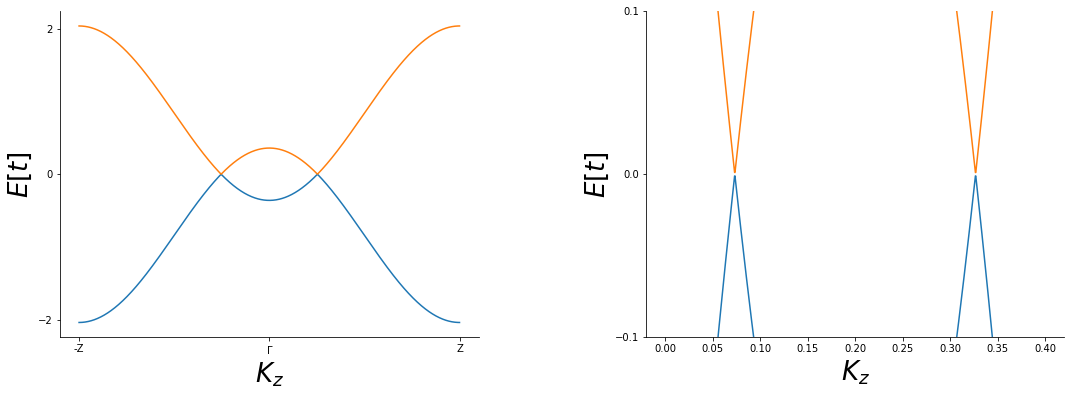

In [2]:
#Parámetros
a=1.0
m=0.7
tp = 1.2              #hopping paralelo
tl = tp*sqrt(1-m**2)#hopping perpendicular 

##################----------------Inicia TB----------------##################
lat= [[a,0,0],[0,a,0],[0,0,a]]
orb= [[0,0,0],[1/2,1/2,1/2]] #H, solo los sitios A[000] B1/2[111]

WSH = tb_model(3,3,lat,orb)

#DIAGONAL
WSH.set_hop(tp/2, 0, 0,[0,0,1])#de que sitio a que sitio va el hoping, [la exp que lleva ese parametro], Conjugado ya no es 
                                #necesario, está implícito porque es Hermitiano.
WSH.set_hop(-tp/2, 1, 1,[0,0,1])

WSH.set_onsite([-tp*m,+tp*m]) # No hay hooping, es energia

#tl*sin(k_x*a)
WSH.set_hop(tl/(2j), 0, 1,[1,0,0])   #Da el transpuesto conjudado (hermiticidad del programa)
WSH.set_hop(-tl/(2j), 0, 1,[-1,0,0]) # de 0 a 1 fuera de la diagonal
#-tl*sin(k_y*a)
WSH.set_hop(-tl/(2), 0, 1,[0,1,0])
WSH.set_hop(tl/(2), 0, 1,[0,-1,0])

###############---------Inicia extraccion de información-----------##############
k=[[0,0,-0.5],[0,0,0.0],[0,0,0.5]] # Punto por los cuales que quiero que pase. Son los punto de al simetria
                                 #unidades en unidades de V de red 1=2pi/a
k_label=["-Z",r"$\Gamma$","Z"]
(k_vec,k_dist,k_node)=WSH.k_path(k,1001,report=False)
Ek,U=WSH.solve_all(k_vec,eig_vectors=True)

#######################---Graficos----######################
 
fig,ax  = plt.subplots(ncols=2,nrows=1,figsize=(18,6),
                       gridspec_kw = {'wspace':0.4, 'hspace':0, 'width_ratios': [1, 1]})
ax[0].plot(k_dist,Ek[0,:],zorder=1,lw=1.5)
ax[0].plot(k_dist,Ek[1,:],zorder=1,lw=1.5)
ax[0].set_xticks(k_node) # puntos de alta simetria, valor que correspomde en k_path
ax[0].set_xticklabels(k_label )
ax[0].set_yticks([-2,0.,2])
# xsticklabels(k_label) 

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_ylabel(r"$E[t]$",fontsize=26)
ax[0].set_xlabel(r"$K_z$",fontsize=26)

k=[[0,0,-0.2],[0,0,0.0],[0,0,0.2]] # Punto por los cuales que quiero que pase. Son los punto de al simetria
                                 #unidades en unidades de V de red 1=2pi/a

(k_vec,k_dist,k_node)=WSH.k_path(k,1001,report=False)
Ek,U=WSH.solve_all(k_vec,eig_vectors=True)
ax[1].plot(k_dist,Ek[0,:],zorder=1,lw=1.5)
ax[1].plot(k_dist,Ek[1,:],zorder=1,lw=1.5)
 # puntos de alta simetria, valor que correspomde en k_path

ax[1].set_yticks([-0.1,0.,0.1])
ax[1].set_ylim([-0.1,0.1])
# xsticklabels(k_label) 

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_ylabel(r"$E[t]$",fontsize=26)
ax[1].set_xlabel(r"$K_z$",fontsize=26)

savefig("WSMGrushinBulkGap.pdf",bbox_inches='tight')

In [9]:
NY_WSM=WSH.cut_piece(100,1,glue_edgs=False) #numero de reps, en la direccion 0x,1y,2z, mi sistema se redujo dimensionalmente
                                            #modo rebanada de jamón
NX_WSM=WSH.cut_piece(100,0,glue_edgs=False)
NZ_WSM=WSH.cut_piece(100,2,glue_edgs=False)

In [12]:
k=[[-0.5,0],[0.0,0],[0.5,0]] # Punto por los cuales que quiero que pase. Son los punto de al simetria
# k=[[0,0.0],[0.0,0.25],[0,.5]]                                 #unidades en unidades de V de red 1=2pi/a
# k=[[-,0],[0.0,0],[1.0,0]]
k_label1=[r"$-Z$",r"$\Gamma$",r"$Z$"]
(k_vec,k_dist,k_node)=NX_WSM.k_path(k,501, report=False)
EkfinX=NX_WSM.solve_all(k_vec)
k=[[0,-0.5],[0.,0],[0,0.5]]  
k_label2=[r"$-X$",r"$\Gamma$",r"$X$"]
(k_vec,k_dist,k_node)=NY_WSM.k_path(k,501, report=False)
EkfinY=NY_WSM.solve_all(k_vec)
k=[[-0.5,0],[0.0,0],[0.5,0]]
k_label3=[r"$-Y$",r"$\Gamma$",r"$Y$"]
(k_vec,k_dist,k_node)=NZ_WSM.k_path(k,501, report=False)
EkfinZ=NZ_WSM.solve_all(k_vec)

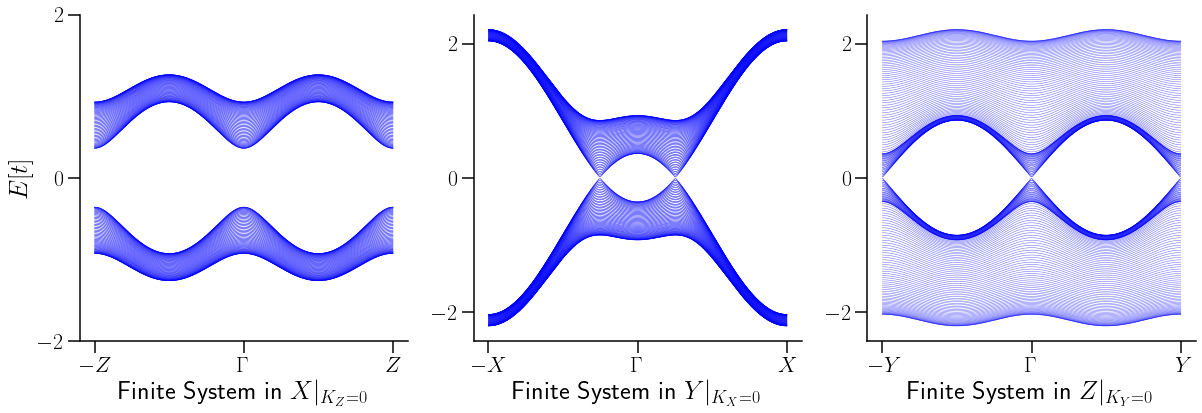

In [13]:
fig,ax  = plt.subplots(ncols=3,nrows=1,figsize=(20,6),
                       gridspec_kw = {'wspace':0.2, 'hspace':0, 'width_ratios': [1, 1,1]})
for n in range(0, len(EkfinX)):
    
    ax[0].plot(k_dist,EkfinX[n,:], c='blue', alpha=0.6,linewidth=0.5) #la long de Ek fin tiene todo
    ax[1].plot(k_dist,EkfinY[n,:], c='blue', alpha=0.6,linewidth=0.5) #la long de Ek fin tiene todo
    ax[2].plot(k_dist,EkfinZ[n,:], c='blue', alpha=0.6,linewidth=0.5) #la long de Ek fin tiene todo

for i in range(0,3):
    ax[i].set_xticks(k_node) # puntos de alta simetria, valor que correspomde en k_path
    
    ax[i].set_yticks([-2,0.,2])
    # xsticklabels(k_label) 

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
ax[0].set_xticklabels(k_label1 )
ax[1].set_xticklabels(k_label2 )
ax[2].set_xticklabels(k_label3 )
ax[0].set_ylabel(r"$E[t]$",fontsize=26)
ax[0].set_xlabel(r"Finite System in $X|_{K_Z=0}$",fontsize=26)
ax[1].set_xlabel(r"Finite System in $Y|_{K_X=0}$",fontsize=26)
ax[2].set_xlabel(r"Finite System in $Z|_{K_Y=0}$",fontsize=26)

# puntos de alta simetria, valor que correspomde en k_path

savefig("Finite_systems_Grushin.pdf",bbox_inches='tight')

## Interactivo

In [3]:
#Parámetros


@interact(a=(0,1,0.1),m=(0,1.5,0.1), tp=(0,1.5,0.1))
# tp          #hopping paralelo
def WSHTot(a=0.5,m=0.5,tp=0.5):
    tl = tp*sqrt(1-m**2)#hopping perpendicular 

    ##################----------------Inicia TB--------------------#######################
    lat = [[a,0,0],[0,a,0],[0,0,a]]
    orb = [[0,0,0],[1/2,1/2,1/2]] #H, solo los sitios A[000] B1/2[111]

    WSH = tb_model(3,3,lat,orb)

    #DIAGONAL
    WSH.set_hop(tp/2, 0, 0,[0,0,1])#de que sitio a que sitio va el hoping, [la exp que lleva ese parametro], Conjugado ya no es 
                                    #necesario, está implícito porque es Hermitiano.
    WSH.set_hop(-tp/2, 1, 1,[0,0,1])

    WSH.set_onsite([-tp*m,+tp*m]) # No hay hooping, es energia

    #tl*sin(k_x*a)
    WSH.set_hop(tl/(2j), 0, 1,[1,0,0])   #Da el transpuesto conjudado (hermiticidad del programa)
    WSH.set_hop(-tl/(2j), 0, 1,[-1,0,0]) # de 0 a 1 fuera de la diagonal
    #-tl*sin(k_y*a)
    WSH.set_hop(-tl/(2), 0, 1,[0,1,0])
    WSH.set_hop(tl/(2), 0, 1,[0,-1,0])

    ###############---------Inicia extraccion de información-----------##############
    k                     = [[0,0,-0.5],[0,0,0.0],[0,0,0.5]] # Punto por los cuales que quiero que pase. Son los punto de al simetria
                                     #unidades en unidades de V de red 1=2pi/a
    k_label               = ["-Z",r"$\Gamma$","Z"]
    (k_vec,k_dist,k_node) = WSH.k_path(k,1001,report=False)
    Ek,U                  = WSH.solve_all(k_vec,eig_vectors=True)

    #######################---Graficos----######################
    pm=plot(k_dist,Ek[0,:])
    pd=plot(k_dist,Ek[1,:])
    xticks(k_node,labels=k_label) # puntos de alta simetria, valor que correspomde en k_path
    # xsticklabels(k_label) 
    xlabel(r"$K_Z$")
    ylabel("E")
    


interactive(children=(FloatSlider(value=0.5, description='a', max=1.0), FloatSlider(value=0.5, description='m'…

## Exploración de la variación de parámetros. 

In [15]:


def WSHTot(a=0.5,m=0.5,tp=0.5):
    tl = tp*sqrt(1-m**2)#hopping perpendicular 

    ##################----------------Inicia TB--------------------#######################
    lat = [[a,0,0],[0,a,0],[0,0,a]]
    orb = [[0,0,0],[1/2,1/2,1/2]] #H, solo los sitios A[000] B1/2[111]

    WSH = tb_model(3,3,lat,orb)

    #DIAGONAL
    WSH.set_hop(tp/2, 0, 0,[0,0,1])#de que sitio a que sitio va el hoping, [la exp que lleva ese parametro], Conjugado ya no es 
                                    #necesario, está implícito porque es Hermitiano.
    WSH.set_hop(-tp/2, 1, 1,[0,0,1])

    WSH.set_onsite([-tp*m,+tp*m]) # No hay hooping, es energia

    #tl*sin(k_x*a)
    WSH.set_hop(tl/(2j), 0, 1,[1,0,0])   #Da el transpuesto conjudado (hermiticidad del programa)
    WSH.set_hop(-tl/(2j), 0, 1,[-1,0,0]) # de 0 a 1 fuera de la diagonal
    #-tl*sin(k_y*a)
    WSH.set_hop(-tl/(2), 0, 1,[0,1,0])
    WSH.set_hop(tl/(2), 0, 1,[0,-1,0])

    ###############---------Inicia extraccion de información-----------##############
    k                     = [[0,0,-0.5],[0,0,0.0],[0,0,0.5]] # Punto por los cuales que quiero que pase. Son los punto de al simetria
                                     #unidades en unidades de V de red 1=2pi/a
    k_label               = ["-Z",r"$\Gamma$","Z"]
    (k_vec,k_dist,k_node) = WSH.k_path(k,1001,report=False)
    Ek,U                  = WSH.solve_all(k_vec,eig_vectors=True)
    return (k_dist, Ek, U, k_node, k_label )
    



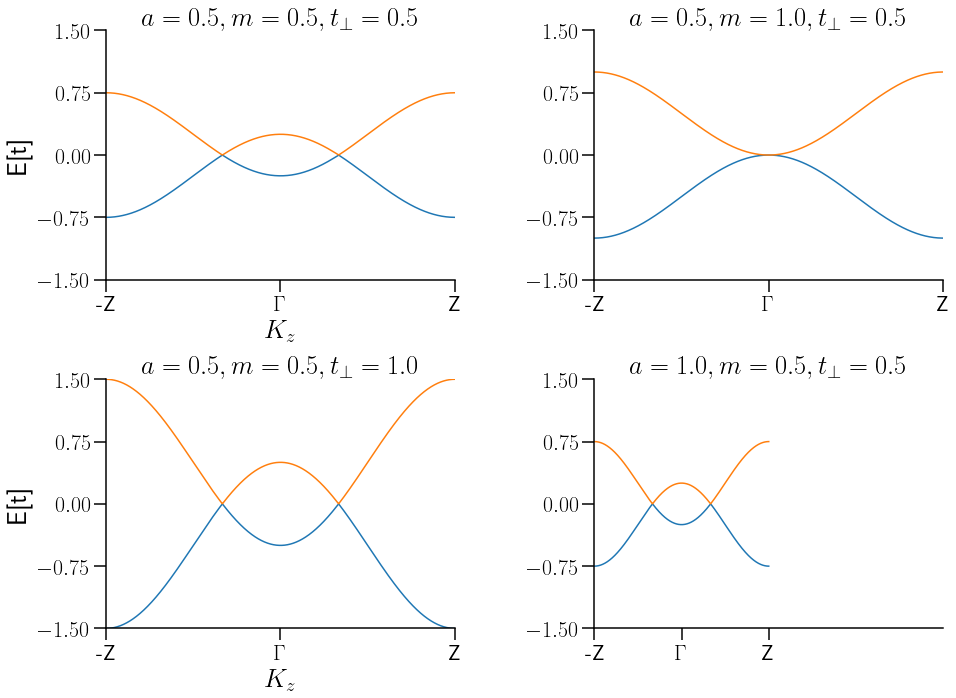

In [16]:
fig, axs = plt.subplots(2, 2,figsize=(15, 11),
                       gridspec_kw = {'wspace':0.4, 'hspace':0.4, 'width_ratios': [1, 1]})

k_dist, Ek, U, k_node, k_label=WSHTot(0.5,0.5,0.5)
axs[0, 0].plot(k_dist,Ek[0])
axs[0, 0].plot(k_dist, Ek[1])
axs[0, 0].set_xticks(k_node)
axs[0, 0].set_xticklabels(k_label)
axs[0, 0].set_title(r"$a=0.5,m=0.5,t_\perp=0.5$")
axs[0,0].set(xlabel=r'$K_z$', ylabel='E[t]')

k_dist, Ek, U, k_node, k_label=WSHTot(0.5,1.0,0.5)
axs[0, 1].plot(k_dist, Ek[0])
axs[0, 1].plot(k_dist, Ek[1])
axs[0, 1].set_xticks(k_node)
axs[0, 1].set_xticklabels(k_label)
axs[0, 1].set_title(r'$a=0.5,m=1.0,t_\perp=0.5$')

k_dist, Ek, U, k_node, k_label=WSHTot(0.5,0.5,1.0)
axs[1, 0].plot(k_dist, Ek[0])
axs[1, 0].plot(k_dist, Ek[1])
axs[1, 0].set_xticks(k_node)
axs[1, 0].set_xticklabels(k_label)
axs[1, 0].set_title(r'$a=0.5,m=0.5,t_\perp=1.0$')
axs[1,0].set(xlabel=r'$K_z$', ylabel='E[t]')

k_dist, Ek, U, k_node, k_label=WSHTot(1.0,0.5,0.5)
axs[1, 1].plot(k_dist, Ek[0])
axs[1, 1].plot(k_dist, Ek[1])
axs[1, 1].set_xticks(k_node)
axs[1, 1].set_xticklabels(k_label)
axs[1, 1].set_title(r'$a=1.0,m=0.5,t_\perp=0.5$')

for ax in axs.flat:
    
    ax.set_xlim(0,2)
    ax.set_ylim(-1,1) 
    ax.set_yticks(linspace(-1.5,1.5,5))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
     # puntos de alta simetria, valor que correspomde en k_path
savefig("VarGrushin.pdf",bbox_inches='tight')    


En la figura enterior se puede observar los efectos de la variación de cada uno de los parámetros del Hamiltoniano.